# Demonstration of SDC Convergence

In [1]:
%matplotlib inline
import riesling as rl
os=1.3
recon_settings=f'--kernel=KB3 --os={os}'

First generate our phantom. We heavily undersample radially (with `--nex`) in order to emphasise the problem. Note that this will make the _correct_ reconstructions very blurry - we are not acquiring a sufficient amount of data at high spatial frequencies to reconstruct the image with precision.

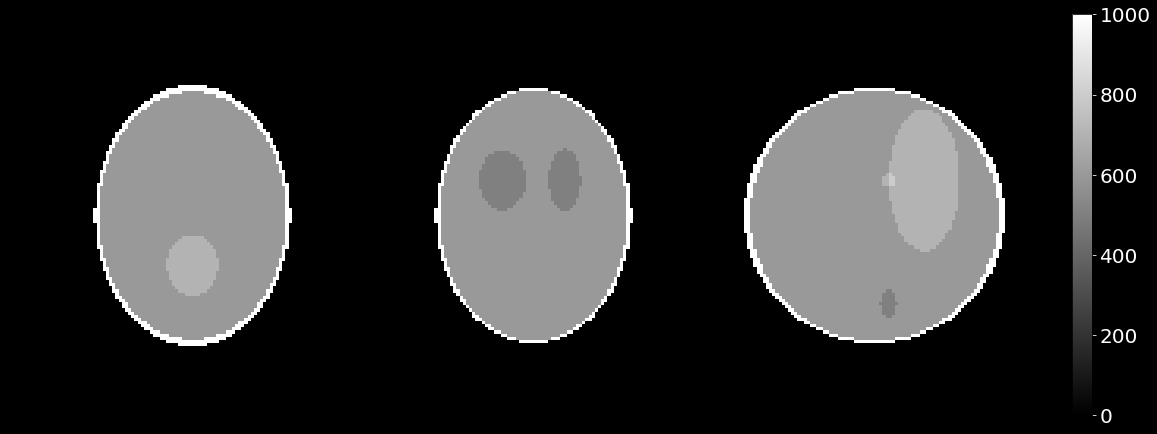

In [2]:
!riesling phantom --fov=192 --matrix=96 --shepp_logan --channels=4 \
  'phantom.h5' --nthreads=16 --os={os} --nex=0.25
rl.images.single('phantom-image.h5')

First, show the trajectory and reconstruct the image with no density compensation to illustrate why we need it with 3D radial. Note the central part of k-space is massively overweighted, leading to low spatial frequences overwhelming the image.

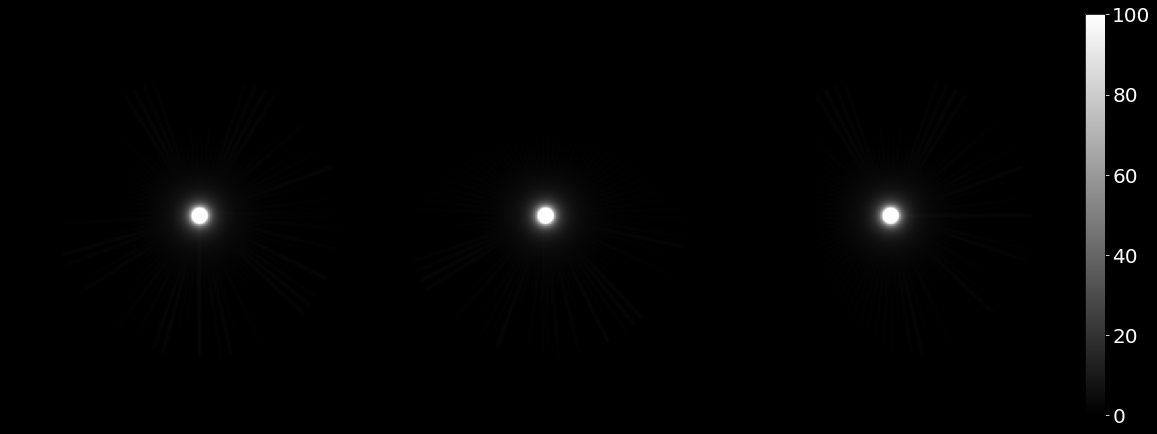

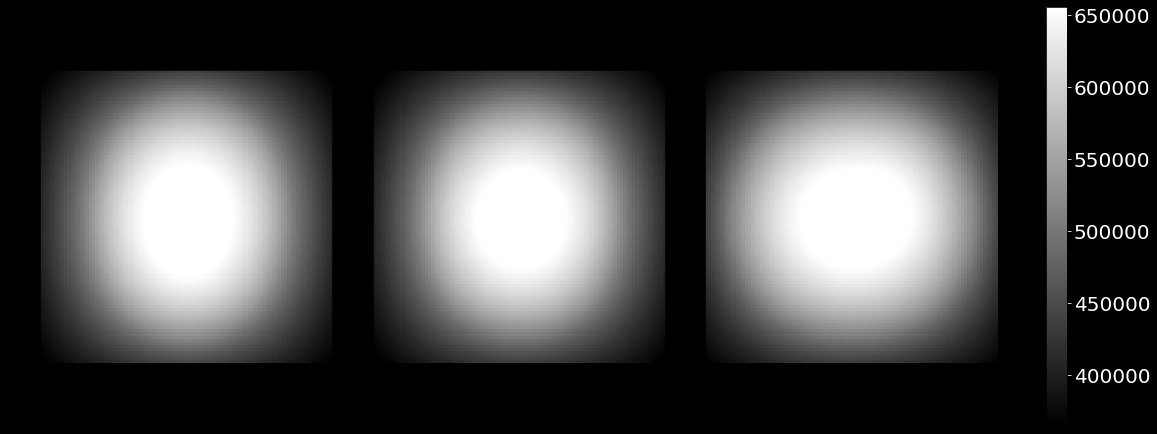

In [3]:
!riesling traj 'phantom.h5' --sdc=none {recon_settings} -o no-sdc
display(rl.images.single('no-sdc-traj.h5', dset='traj-image', vmin=0, vmax=100))
!riesling recon 'phantom.h5' --sdc=none {recon_settings} -o no-sdc
display(rl.images.single('no-sdc-recon.h5', dset='image'))

Now, we repeat the same with analytic radial weights. Note that there is a 'halo' where k-space transitions from fully-sampled to under-sampled. This means that although we do get a reconstruction that actually looks like a phantom, some spatial frequencies are still over-emphasised, which leads to some odd ringing like artefacts at the edge of the phantom.

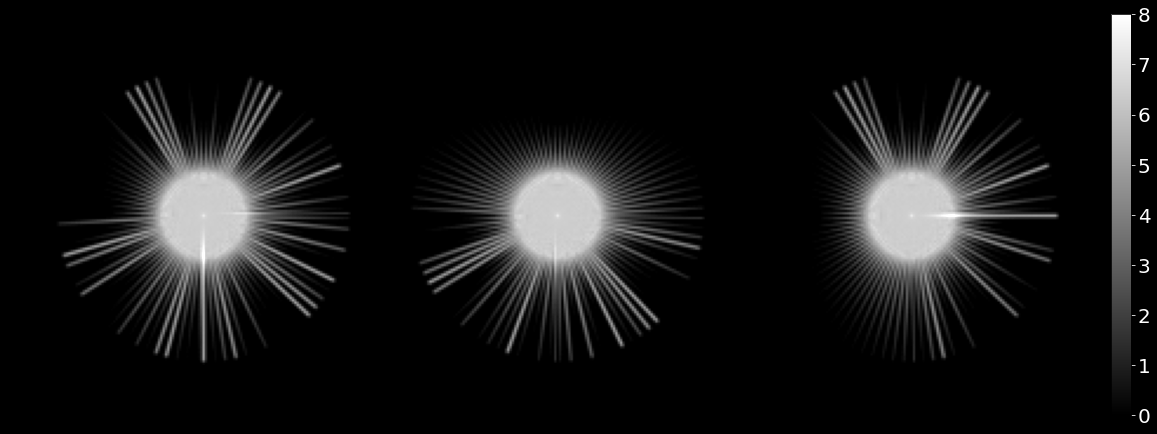

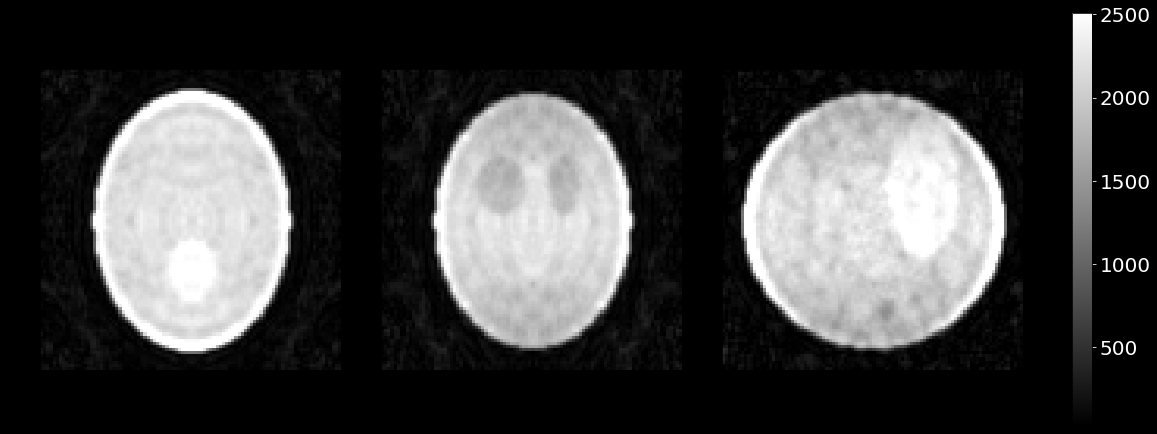

In [4]:
!riesling traj 'phantom.h5' --sdc=radial {recon_settings} -o radial
display(rl.images.single('radial-traj.h5', dset='traj-image', vmin=0, vmax=8))
!riesling recon 'phantom.h5' --sdc=radial {recon_settings} -o radial
display(rl.images.single('radial-recon.h5', dset='image'))

Finally we use Pipe's method (http://doi.wiley.com/10.1002/mrm.23041). This is an iterative method to estimate the density of _any_ trajectory, not just radial, and also deals elegantly with undersampling and multiple k-spaces (e.g. WASPI). It is the default method in `riesling`, but we pass `--sdc=pipe` here to make it explicit. The trajectory density is now much flatter and the reconstructed image, although low quality due to the undersampling, does not have any major artefacts.

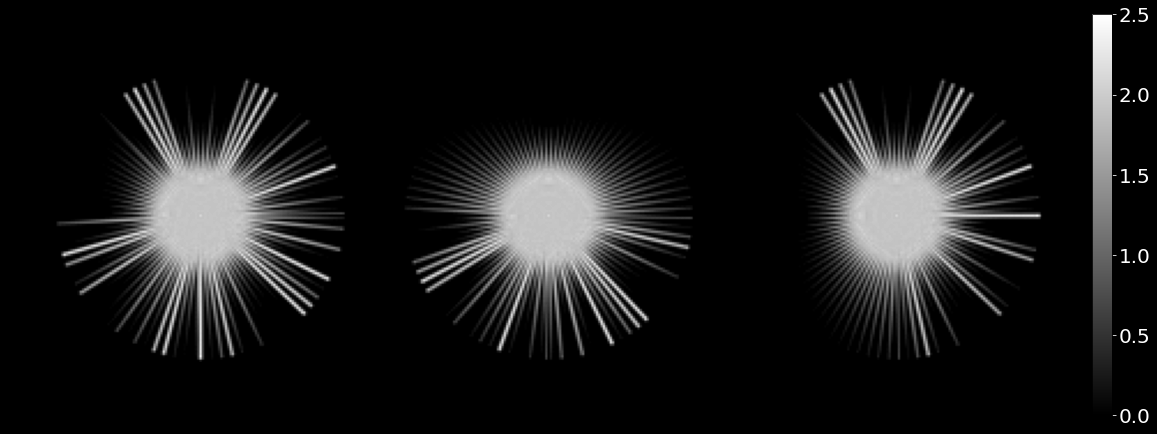

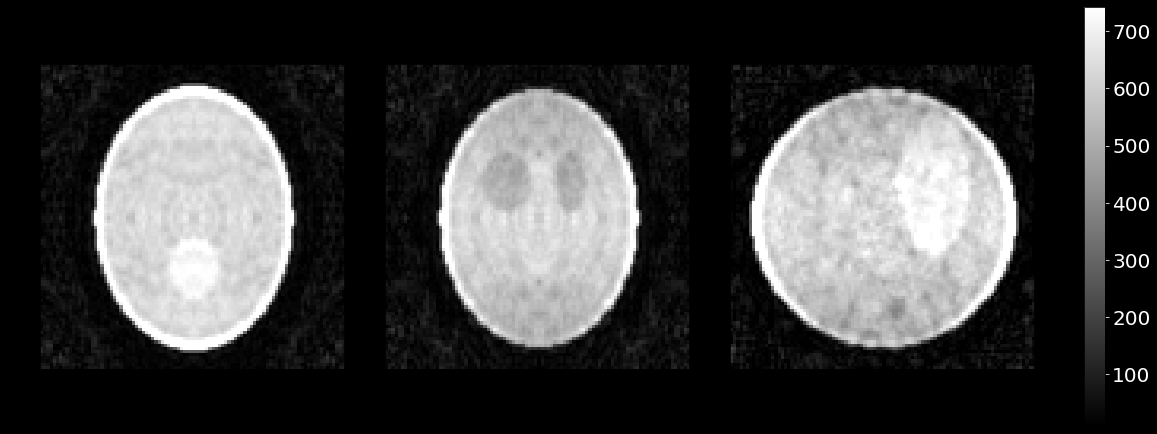

In [5]:
!riesling traj 'phantom.h5' --sdc=pipe {recon_settings} -o pipe
display(rl.images.single('pipe-traj.h5', dset='traj-image', vmin=0, vmax=2.5))
!riesling recon 'phantom.h5' --sdc=pipe {recon_settings} -o pipe
display(rl.images.single('pipe-recon.h5', dset='image'))